Entregar um notebook Python que contempla:
1 - Pelo menos 10 imagens diferentes obtidas da Internet, de licença aberta;
2 - Pipeline de processamento e preparação de dados de imagens e funções de testes que compara resultados esperados com os obtidos;
3 - Base de dados de imagens processadas em um dataframe."

In [1]:
from google.colab import drive
drive.mount('/content/drive')
base_path = r"/content/drive/My Drive/cats"

Mounted at /content/drive


In [13]:
import os
from PIL import Image
import numpy as np

Redimensionamento das imagens para um tamanho padrão.

In [9]:
output = r"/content/drive/My Drive/output_cats"

new_size = (150, 150)

def resize_images(input_folder, output_folder, new_size):
    # Cria a pasta de saída se ela não existir
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Percorre todos os arquivos na pasta de entrada
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(input_folder, filename)
            img = Image.open(img_path)
            # Redimensiona a imagem
            img_resized = img.resize(new_size)
            # Constrói o caminho completo da nova imagem
            output_path = os.path.join(output_folder, filename)
            # Salva a imagem redimensionada
            img_resized.save(output_path)
            print(f'Imagem {filename} redimensionada e salva em {output_path}')

# Chamada da função
resize_images(base_path, output, new_size)

Imagem cats-eyes-5428855_1280.jpg redimensionada e salva em /content/drive/My Drive/output_cats/cats-eyes-5428855_1280.jpg
Imagem cat-8540772_1280.jpg redimensionada e salva em /content/drive/My Drive/output_cats/cat-8540772_1280.jpg
Imagem simba-8618301_1280.jpg redimensionada e salva em /content/drive/My Drive/output_cats/simba-8618301_1280.jpg
Imagem cat-8578562_1280.jpg redimensionada e salva em /content/drive/My Drive/output_cats/cat-8578562_1280.jpg
Imagem cat-551554_1280.jpg redimensionada e salva em /content/drive/My Drive/output_cats/cat-551554_1280.jpg
Imagem cat-1192026_1280.jpg redimensionada e salva em /content/drive/My Drive/output_cats/cat-1192026_1280.jpg
Imagem pexels-stephany-lorena-276313736-16257530.jpg redimensionada e salva em /content/drive/My Drive/output_cats/pexels-stephany-lorena-276313736-16257530.jpg
Imagem pexels-kowalievska-1170986.jpg redimensionada e salva em /content/drive/My Drive/output_cats/pexels-kowalievska-1170986.jpg
Imagem pexels-vatius-127028.

Conversão de cores para tons de cinza ou outras transformações

In [14]:
def convert_to_red(input_folder, output_folder):
    # Cria a pasta de saída se ela não existir
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Percorre todos os arquivos na pasta de entrada
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(base_path, filename)
            img = Image.open(img_path)

            # Converte a imagem para uma matriz NumPy para manipulação de pixels
            img_array = np.array(img)

            # Define os canais verde e azul para zero
            if len(img_array.shape) >= 3:  # Verifica se a imagem é colorida
                img_array[..., 1] = 0  # Canal verde
                img_array[..., 2] = 0  # Canal azul

            # Converte a matriz NumPy de volta para uma imagem PIL
            img_red = Image.fromarray(img_array)

            # Mostra a imagem convertida para vermelho
            img_red.show()

            # Constrói o caminho completo da nova imagem
            output_path = os.path.join(output_folder, filename)

            # Salva a imagem convertida
            img_red.save(output_path)
            print(f'Imagem {filename} convertida para vermelho e salva em {output}')

# Chamada da função
convert_to_red(base_path, output)

Imagem cats-eyes-5428855_1280.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem cat-8540772_1280.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem simba-8618301_1280.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem cat-8578562_1280.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem cat-551554_1280.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem cat-1192026_1280.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem pexels-stephany-lorena-276313736-16257530.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem pexels-kowalievska-1170986.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem pexels-vatius-127028.jpg convertida para vermelho e salva em /content/drive/My Drive/output_cats
Imagem pexels-366671-991831.jpg convertida para vermel

Extração de características específicas das imagens, como histograma de cores ou características de textura.




In [19]:
!pip install opencv-python

In [32]:
import cv2
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops


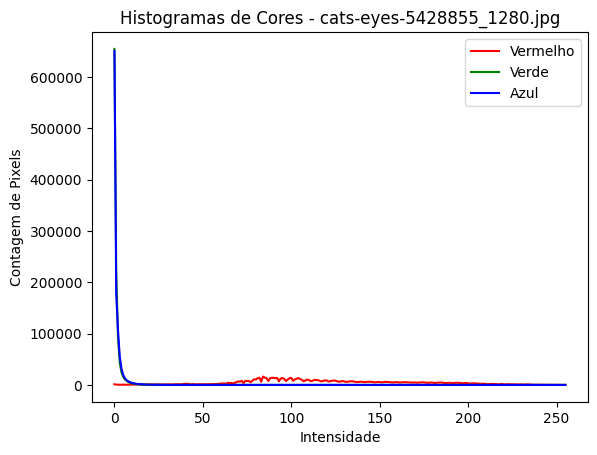

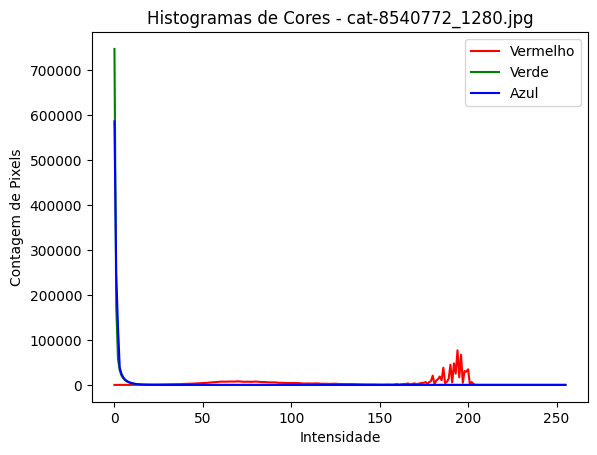

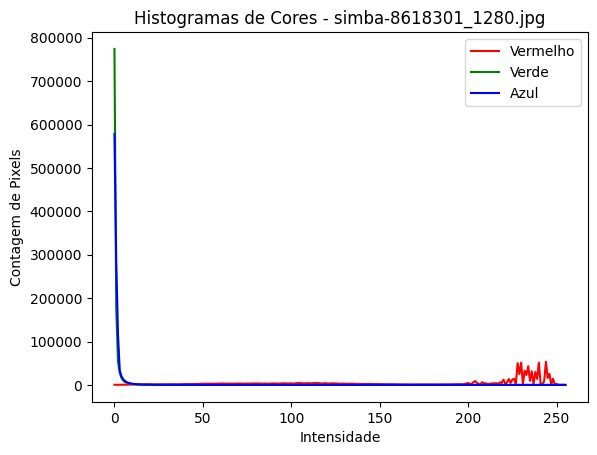

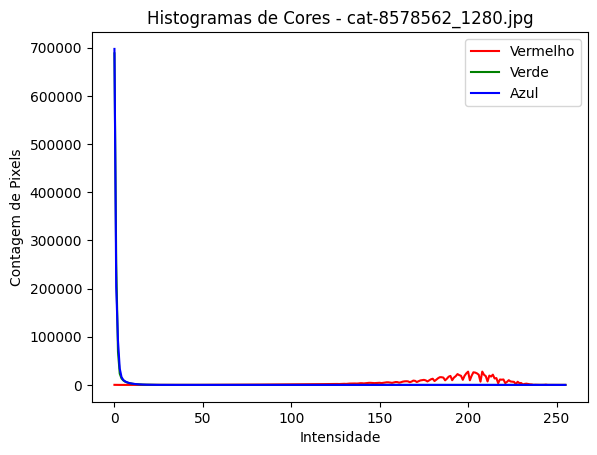

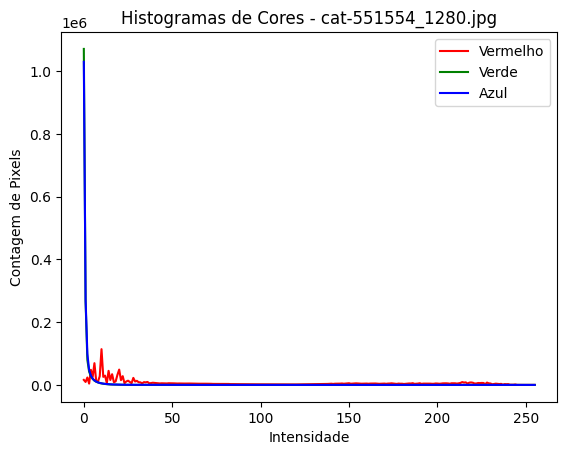

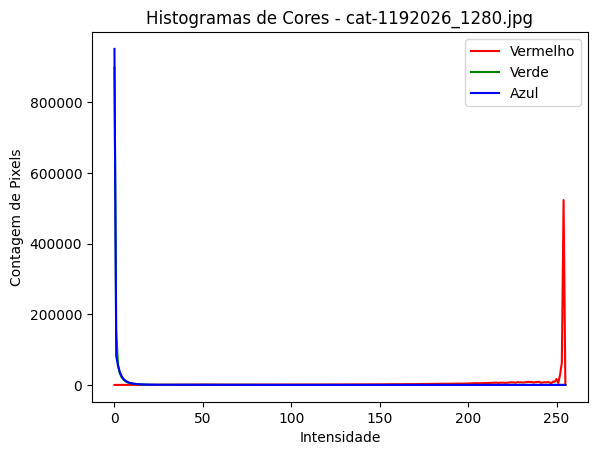

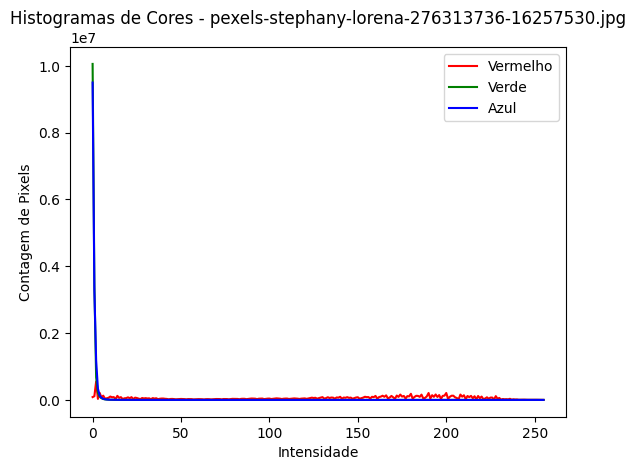

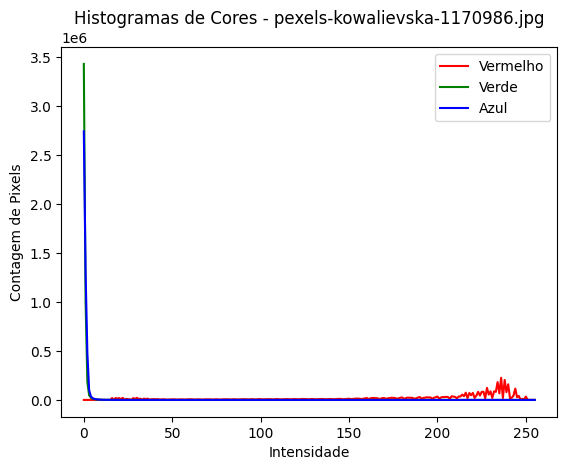

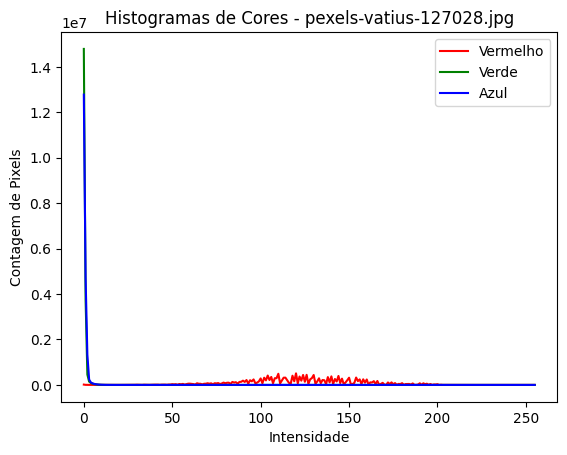

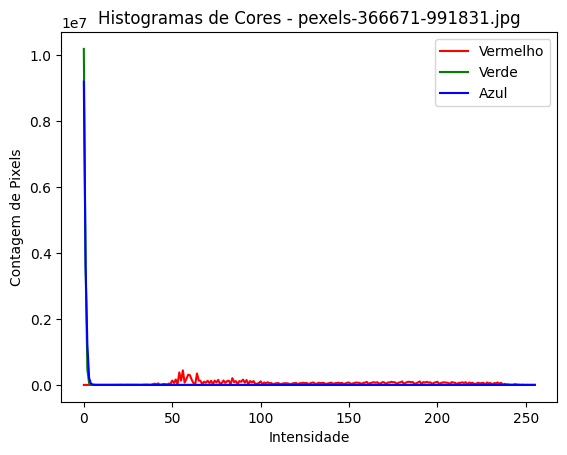

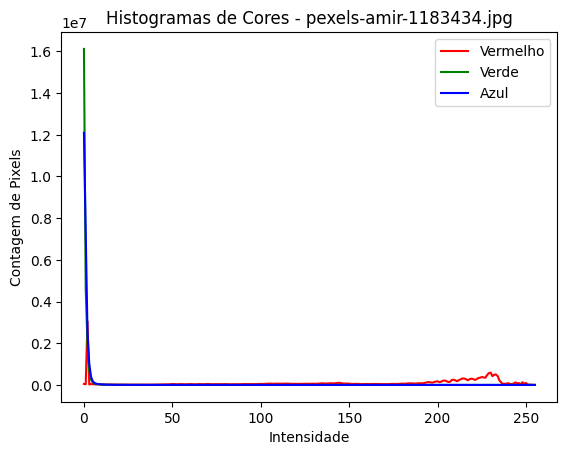

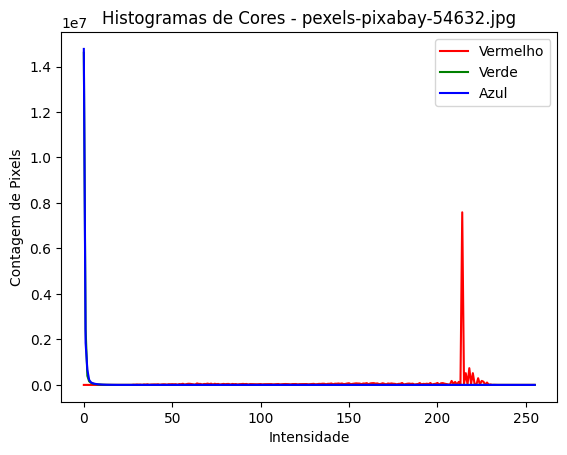

In [31]:
def extract_color_histogram_from_drive(image_folder):
    # Verifica se o caminho da pasta existe
    if not os.path.exists(image_folder):
        print(f"A pasta {image_folder} não existe.")
        return

    # Percorre todos os arquivos na pasta
    for filename in os.listdir(image_folder):
        # Verifica se o arquivo é uma imagem
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Caminho completo para a imagem
            image_path = os.path.join(image_folder, filename)

            # Carrega a imagem
            img = cv2.imread(image_path)

            # Verifica se a imagem foi carregada corretamente
            if img is None:
                print(f"Erro ao carregar a imagem {filename}.")
                continue

            # Calcula o histograma para cada canal de cor
            hist_r = cv2.calcHist([img], [2], None, [256], [0, 256])
            hist_g = cv2.calcHist([img], [1], None, [256], [0, 256])
            hist_b = cv2.calcHist([img], [0], None, [256], [0, 256])

            # Visualiza os histogramas
            plt.figure()
            plt.title(f"Histogramas de Cores - {filename}")
            plt.xlabel("Intensidade")
            plt.ylabel("Contagem de Pixels")
            plt.plot(hist_r, color='r', label='Vermelho')
            plt.plot(hist_g, color='g', label='Verde')
            plt.plot(hist_b, color='b', label='Azul')
            plt.legend()
            plt.show()

# Exemplo de uso: caminho da pasta onde estão as imagens
image_folder = '/content/drive/My Drive/output_cats'
extract_color_histogram_from_drive(image_folder)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skim

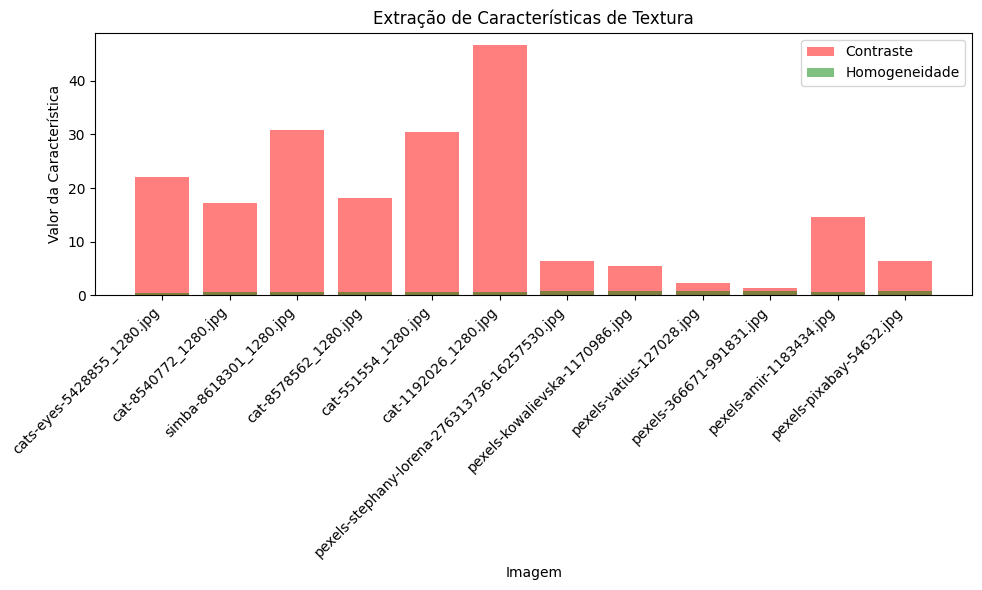

In [39]:
def extract_texture_features_from_drive(output):
    # Verifica se o caminho da pasta existe
    if not os.path.exists(image_folder):
        print(f"A pasta {image_folder} não existe.")
        return

    # Inicializa listas para armazenar as características
    filenames = []
    contrasts = []
    homogeneities = []


    # Percorre todos os arquivos na pasta
    for filename in os.listdir(image_folder):
        # Verifica se o arquivo é uma imagem
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Caminho completo para a imagem
            image_path = os.path.join(image_folder, filename)

            # Carrega a imagem
            img = cv2.imread(image_path)

            # Verifica se a imagem foi carregada corretamente
            if img is None:
                print(f"Erro ao carregar a imagem {filename}.")
                continue

            # Extrai o canal vermelho da imagem
            red_channel = img[:, :, 2]

            # Calcula a GLCM
            glcm = greycomatrix(red_channel, distances=[1], angles=[0], levels=256, symmetric=True, normed=True)

            # Extrai características de textura
            contrast = greycoprops(glcm, 'contrast')[0, 0]
            homogeneity = greycoprops(glcm, 'homogeneity')[0, 0]

            # Armazena as características
            filenames.append(filename)
            contrasts.append(contrast)
            homogeneities.append(homogeneity)

    # Plotar os valores das características em um gráfico de barras
    plt.figure(figsize=(10, 6))
    plt.bar(filenames, contrasts, color='r', alpha=0.5, label='Contraste')
    plt.bar(filenames, homogeneities, color='g', alpha=0.5, label='Homogeneidade')
    plt.xlabel('Imagem')
    plt.ylabel('Valor da Característica')
    plt.title('Extração de Características de Textura')
    plt.legend()
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Exemplo de uso: caminho da pasta onde estão as imagens
image_folder = '/content/drive/My Drive/output_cats'
extract_texture_features_from_drive(image_folder)

Conjunto de casos de teste baseados nas imagens processadas, comparando as características extraídas ou a aparência da imagem processada com resultados esperados.

Criação de um DataFrame de Imagens Processadas